In [15]:
from matplotlib.patches import PathPatch, Rectangle
from matplotlib.path import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import pandas as pd
from matplotlib.axes import Axes
from matplotlib.figure import Figure
import numpy as np
from numpy.typing import NDArray
from typing import Optional, List, Union, Dict, TypeAlias, Tuple, Literal

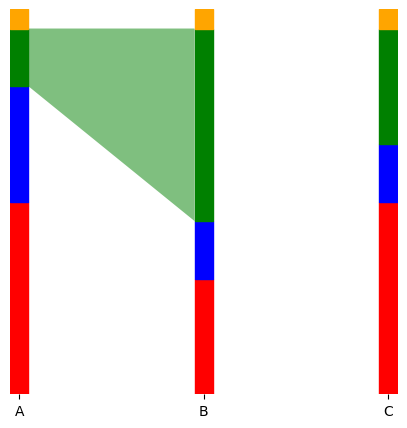

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.xaxis.set_major_locator(FixedLocator([0, 1, 2]))
ax.set_xlim([0 - 0.05, 2 + 0.05])
ax.set_xticklabels(["A", "B", "C"])

ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.set_yticks([])

sizes = [[0.5, 0.3, 0.15, 0.05], [0.3, 0.15, 0.5, 0.05], [0.5, 0.15, 0.3, 0.05]]
colors = ["red", "blue", "green", "orange"]
for index, size in enumerate(sizes):
    for a_index, a_size in enumerate(size):
        rect = Rectangle(
            xy=(index - 0.05, sum(size[:a_index])), width=0.1, height=a_size, color=colors[a_index], zorder=1
        )
        ax.add_patch(rect)


ax.add_patch(poly)

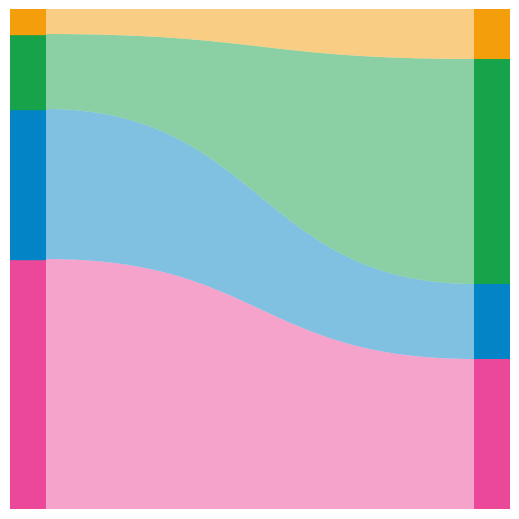

In [ ]:
CurveType: TypeAlias = Literal["curve3", "curve4", "line"]


def _clean_axis(_ax: Axes, frameon: bool = True) -> Axes:
    """Helper function to clean axes."""
    _ax.set_yticklabels([])
    _ax.set_xticklabels([])
    _ax.set_ylim(0, 1)
    _ax.set_yticks([])
    _ax.set_xticks([])

    if frameon is False:
        # Despine
        _ax.spines["top"].set_visible(False)
        _ax.spines["left"].set_visible(False)
        _ax.spines["right"].set_visible(False)
        _ax.spines["bottom"].set_visible(False)
    return _ax


def sankey(
    data: NDArray,
    colors: Union[NDArray, List[str]],
    spacing: float = 0.2,
    frameon: bool = True,
    figsize: Tuple[int, int] = (5, 5),
    curve_type: CurveType = "curve4",
    alpha: float = 0.5,
    # ax: Optional[Axes] = None,
    tight_layout: bool = False,
) -> Figure:
    """Plot sankey."""
    fig, (ax0, ax1, ax2) = plt.subplots(
        nrows=1,
        ncols=3,
        sharey=True,
        width_ratios=[1, 12, 1],
        frameon=frameon,
        figsize=figsize,
    )
    # Remove spacing
    fig.subplots_adjust(hspace=0, wspace=0)

    total_height = 1.0 + (len(colors) * spacing)

    ax0 = _clean_axis(ax0, frameon=False)
    ax0.set_ylim(0.0, total_height)

    for index, size in enumerate(data[0]):
        rect = Rectangle(
            xy=(0, sum(data[0][:index]) + (index * spacing)), width=1, height=size, color=colors[index], zorder=1
        )
        ax0.add_patch(rect)

    ax1 = _clean_axis(ax1, frameon=False)
    ax1.set_ylim(0.0, total_height)

    for index in range(len(colors)):
        y1_start = sum(data[0][:index])
        y1_end = sum(data[1][:index])

        y2_start = sum(data[1][: index + 1])
        y2_end = sum(data[0][: index + 1])

        poly: PathPatch
        path_patch_kwargs = {
            "color": colors[index],
            "zorder": 0,
            "alpha": alpha,
            "lw": 0,
        }

        # Add curves
        if curve_type == "curve4":
            poly = PathPatch(
                Path(
                    vertices=[
                        (0.0, y1_start + (spacing * index)),
                        (0.5, y1_start + (spacing * index)),
                        (0.5, y1_end + (spacing * index)),
                        (1, y1_end + (spacing * index)),
                        (1, y2_start + (spacing * index)),
                        (0.5, y2_start + (spacing * index)),
                        (0.5, y2_end + (spacing * index)),
                        (0, y2_end + (spacing * index)),
                    ],
                    codes=[
                        Path.MOVETO,
                        Path.CURVE4,
                        Path.CURVE4,
                        Path.CURVE4,
                        Path.LINETO,
                        Path.CURVE4,
                        Path.CURVE4,
                        Path.CURVE4,
                    ],
                    closed=True,
                ),
                **path_patch_kwargs,
            )
        elif curve_type == "curve3":
            poly = PathPatch(
                Path(
                    vertices=[
                        (0.0, y1_start + (spacing * index)),
                        (0.5, (y1_start - y1_end) + y1_end + (spacing * index)),
                        (1, y1_end + (spacing * index)),
                        (1, y2_start + (spacing * index)),
                        (0.5, (y2_start - y2_end) + y2_end + (spacing * index)),
                        (0, y2_end + (spacing * index)),
                    ],
                    codes=[Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.LINETO, Path.CURVE3, Path.CURVE3],
                    closed=True,
                ),
                **path_patch_kwargs,
            )
        elif curve_type == "line":
            poly = PathPatch(
                Path(
                    vertices=[
                        (0, y1_start + (spacing * index)),
                        (1, y1_end + (spacing * index)),
                        (1, y2_start + (spacing * index)),
                        (0, y2_end + (spacing * index)),
                    ],
                    codes=[Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO],
                    closed=True,
                ),
                **path_patch_kwargs,
            )
        ax1.add_patch(poly)

    ax2 = _clean_axis(ax2, frameon=False)
    ax2.set_ylim(0.0, total_height)

    for index, size in enumerate(data[1]):
        rect = Rectangle(
            xy=(0, sum(data[1][:index]) + (index * spacing)),
            width=1,
            height=size,
            color=colors[index],
            zorder=1,
            lw=0,
        )
        ax2.add_patch(rect)

    fig.tight_layout(pad=0)
    plt.close()
    return fig


data = [[0.5, 0.3, 0.15, 0.05], [0.3, 0.15, 0.45, 0.1]]
colors = ["#ec4899", "#0284c7", "#16a34a", "#f59e0b"]

fig = sankey(data=data, colors=colors, spacing=0.0, frameon=False, alpha=0.5, curve_type="curve4", tight_layout=True)
fig.savefig("./docs/logo.png", dpi=200)
fig.savefig("./docs/logo.svg")
fig